In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Номер варианта:"+str(56%12+1))

Номер варианта:9


### 1. Скачать набор данных в соответствии с вариантом. Проанализировать набор данных: статистику по переменным, классы, количество объектов, количество пропущенных значений.

In [3]:
data_set = pandas.read_csv('archive/MIT-BIH Arrhythmia Database.csv')
print(data_set.shape)
data_set

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


Набор данных представляет из себя 100689 строк с данными.

В наборt данных первый столбец с именем "record" - это имя субъекта/пациента.

Есть пять классов/категорий: N (Normal), S (Supraventricular ectopic beat), V (Ventricular ectopic beat), F (Fusion beat) и Q (Unknown beat). Столбец "type" содержит информацию о классе.

Остальные 34 столбца содержат 17 элементов для каждого ведущего ЭКГ (17 элементов для свинца II и 17 элементов для свинца V5)

In [4]:
data_set.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


In [5]:
data_set.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

В данном наборе данных нет пропущенных значений.

In [6]:
X = data_set.drop(['type','record'], axis=1)
y = data_set['type']
columns = data_set.columns[2:]
print(columns)

Index(['0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak',
       '0_qPeak', '0_qrs_interval', '0_pq_interval', '0_qt_interval',
       '0_st_interval', '0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2',
       '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR', '1_pPeak',
       '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


### 2. Построить и визуализировать дерево решений (ограничить глубину дерева 3 уровнями). Вычислить метрики качества классификации. Записать найденные правила в виде логических утверждений.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred)) #для оценки точности классификации
print()
print(classification_report(y_test, y_pred))   #текстовый отчет, показывающий основные показатели классификации.
print("f1-score для дерева максимальной глубины 3:",
      classification_report(y_test, y_pred, output_dict=True)['accuracy'])

[[    0   177     0     0    26]
 [    0 22400     0     0   112]
 [    0     7     0     0     1]
 [    0   633     0     0    34]
 [    0   661     0     0  1122]]

              precision    recall  f1-score   support

           F       0.00      0.00      0.00       203
           N       0.94      1.00      0.97     22512
           Q       0.00      0.00      0.00         8
        SVEB       0.00      0.00      0.00       667
         VEB       0.87      0.63      0.73      1783

    accuracy                           0.93     25173
   macro avg       0.36      0.32      0.34     25173
weighted avg       0.90      0.93      0.92     25173

f1-score для дерева максимальной глубины 3: 0.9344138561156795


[Text(0.5, 0.875, '1_pre-RR <= 198.5\ngini = 0.194\nsamples = 75516\nvalue = [600, 67571, 7, 2112, 5226]\nclass = N'),
 Text(0.25, 0.625, '0_st_interval <= 11.5\ngini = 0.582\nsamples = 9871\nvalue = [190, 5020, 3, 808, 3850]\nclass = N'),
 Text(0.125, 0.375, '1_st_interval <= 18.5\ngini = 0.447\nsamples = 5855\nvalue = [118, 4216, 0, 661, 860]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.305\nsamples = 4835\nvalue = [105, 3986, 0, 567, 177]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.492\nsamples = 1020\nvalue = [13, 230, 0, 94, 683]\nclass = VEB'),
 Text(0.375, 0.375, '0_sPeak <= -1.078\ngini = 0.404\nsamples = 4016\nvalue = [72, 804, 3, 147, 2990]\nclass = VEB'),
 Text(0.3125, 0.125, 'gini = 0.101\nsamples = 2354\nvalue = [70, 40, 3, 11, 2230]\nclass = VEB'),
 Text(0.4375, 0.125, 'gini = 0.573\nsamples = 1662\nvalue = [2, 764, 0, 136, 760]\nclass = N'),
 Text(0.75, 0.625, '0_qrs_morph4 <= -0.979\ngini = 0.091\nsamples = 65645\nvalue = [410, 62551, 4, 1304, 1376]\nclass = N'),
 Text

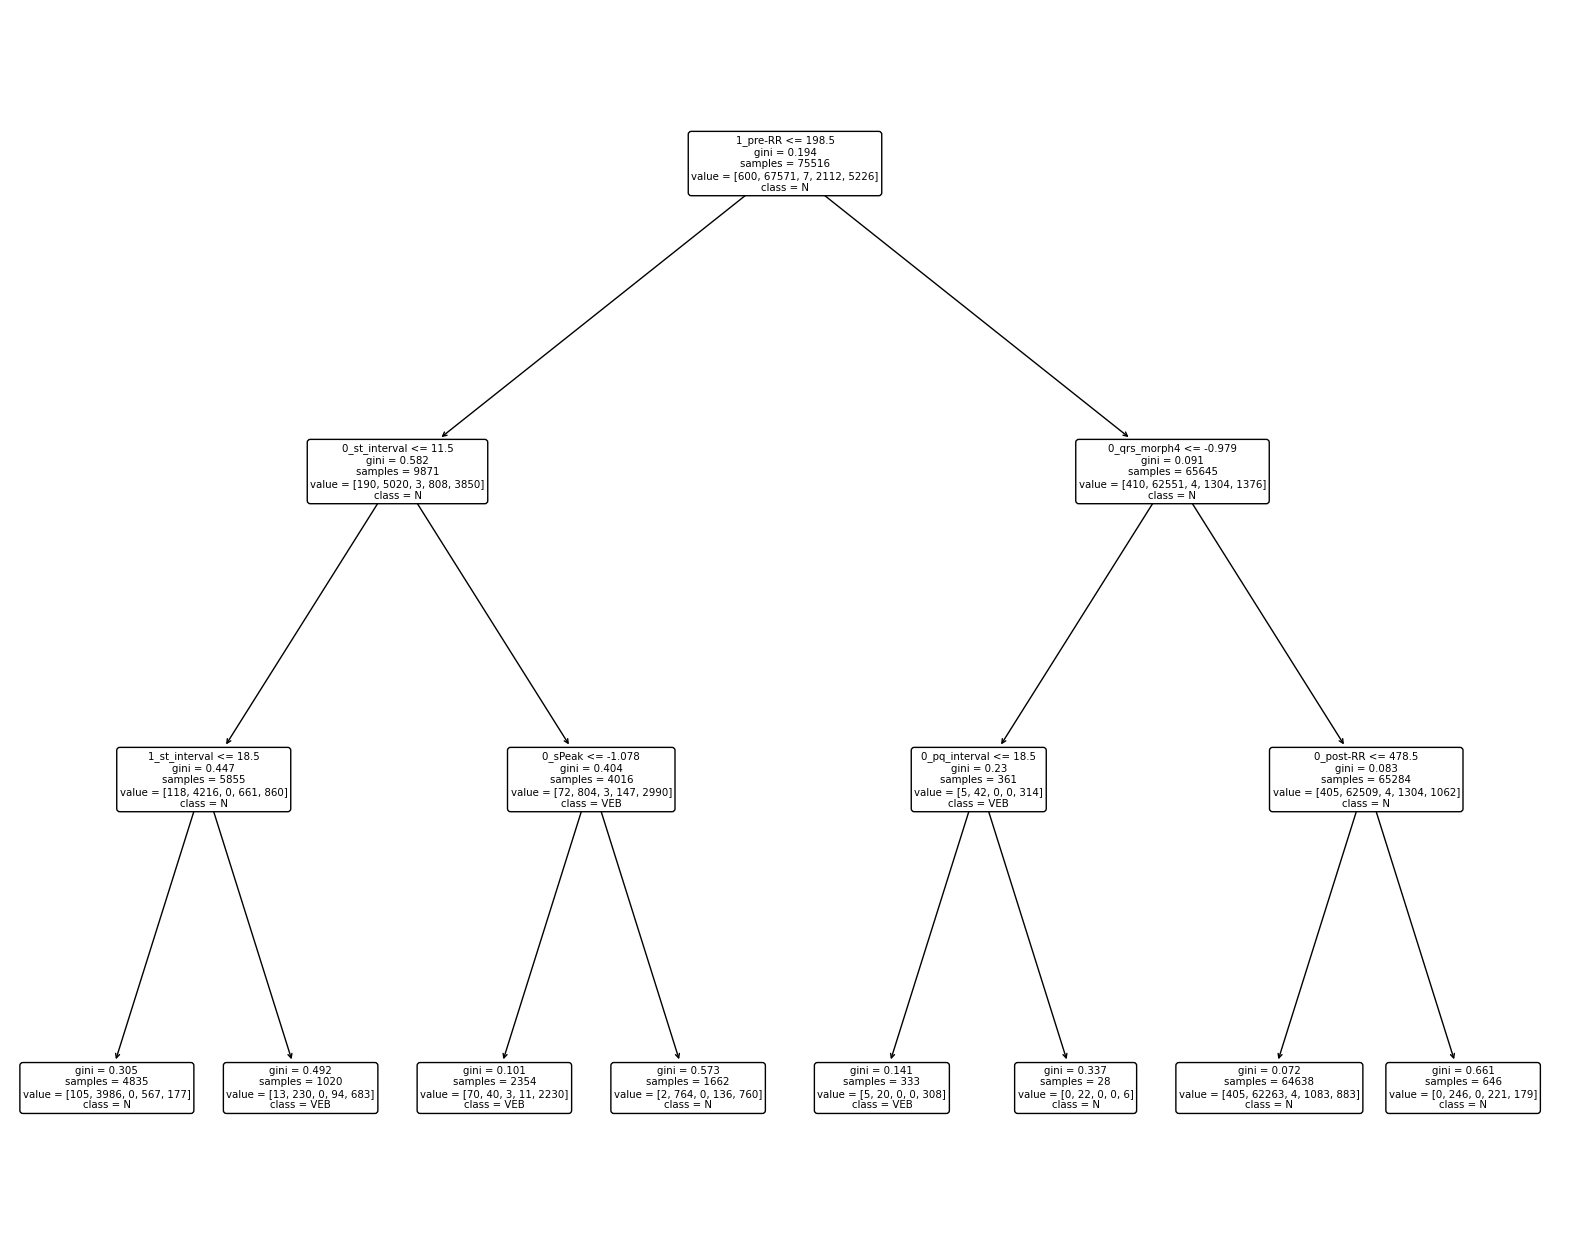

In [8]:
plt.figure(figsize=(20, 16))
plot_tree(classifier, feature_names = columns, class_names = ['F','N','Q','SVEB', 'VEB'], rounded = True)
#нет слева, да справа

### если 0_pre-RR <= 199.5, 0_qrs_morph4 <= -0.978 и 1_post-RR <= 505.5 , то класс SVEB
### если 0_pre-RR <= 199.5, 0_qrs_morph4 <= -0.978 и !1_post-RR <= 505.5 , то класс N
### если !0_pre-RR <= 199.5, 0_st_interval <= 12.5 и 0_sPeak <= -1.029 , то класс N

### 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева. Исследовать влияние критерия, по которому выполняется разбиение узлов дерева.

In [9]:
param_test1 = {'max_leaf_nodes':range(2,80,2)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
gsearch1 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_test1,n_jobs=16)
#Исчерпывающий поиск по указанным значениям параметров для оценщика.
gsearch1.fit(X_train,y_train)
print(gsearch1.cv_results_[ 'mean_test_score'])
print("максимальное значение числа узлов ",gsearch1.best_params_)
print("лучший результат", gsearch1.best_score_)

[0.8947243  0.92895542 0.93345779 0.93899302 0.94283327 0.94517714
 0.94769316 0.9503946  0.95575769 0.95702894 0.95938606 0.96023357
 0.96110755 0.96184912 0.96273637 0.96384872 0.96456379 0.96571586
 0.96623231 0.96702685 0.96758301 0.96791407 0.96836431 0.9685497
 0.9686424  0.96885428 0.96914561 0.96942369 0.96976799 0.97013878
 0.9703639  0.97039038 0.9705228  0.97090682 0.97123787 0.97144974
 0.97155568 0.97170135 0.97200592]
максимальное значение числа узлов  {'max_leaf_nodes': 78}
лучший результат 0.9720059212756025


In [10]:
param_test1 = {'max_leaf_nodes':range(2,80,2)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
gsearch1 = GridSearchCV(estimator = DecisionTreeClassifier(criterion = 'entropy'), param_grid = param_test1,n_jobs=16)
gsearch1.fit(X_train,y_train)
print(gsearch1.cv_results_[ 'mean_test_score'])
print("максимальное значение числа узлов ",gsearch1.best_params_)
print("лучший результат", gsearch1.best_score_)

[0.8949759  0.92257272 0.92714124 0.93274278 0.94150912 0.94985166
 0.95146722 0.95243391 0.9534933  0.95345357 0.95549287 0.95636685
 0.95751893 0.95853858 0.95920068 0.96072355 0.96194183 0.96319984
 0.96361035 0.96465647 0.96522589 0.96574234 0.96698712 0.96741088
 0.9677022  0.96807299 0.96816568 0.96840403 0.96911912 0.96952963
 0.96996662 0.97040362 0.97066846 0.97110546 0.9715557  0.97200593
 0.97224428 0.97240319 0.97257534]
максимальное значение числа узлов  {'max_leaf_nodes': 78}
лучший результат 0.9725753410619957


Различия между критериями небольшие, сравнивались gini и entropy.

### 4. Применить метод градиентного бустинга. Вывести список построенных деревьев (первые 3). Вычислить значимость переменных. Построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print("f1-score:", classification_report(y_test, y_pred, output_dict=True)['accuracy'])

[[  123    38     1     0     7]
 [    8 17896    10    22    49]
 [    0     0     0     0     0]
 [    0   143     0   387    11]
 [    8    78     1     7  1349]]

              precision    recall  f1-score   support

           F       0.88      0.73      0.80       169
           N       0.99      1.00      0.99     17985
           Q       0.00      0.00      0.00         0
        SVEB       0.93      0.72      0.81       541
         VEB       0.95      0.93      0.94      1443

    accuracy                           0.98     20138
   macro avg       0.75      0.67      0.71     20138
weighted avg       0.98      0.98      0.98     20138

f1-score: 0.9809812295163373


[Text(0.5, 0.875, '1_qrs_morph4 <= -2.237\nfriedman_mse = 0.008\nsamples = 80551\nvalue = 0.0'),
 Text(0.25, 0.625, '1_qt_interval <= 42.5\nfriedman_mse = 0.182\nsamples = 314\nvalue = 0.753'),
 Text(0.125, 0.375, '0_rPeak <= 1.183\nfriedman_mse = 0.068\nsamples = 257\nvalue = 0.918'),
 Text(0.0625, 0.125, 'friedman_mse = -0.0\nsamples = 10\nvalue = -0.806'),
 Text(0.1875, 0.125, 'friedman_mse = 0.035\nsamples = 247\nvalue = 97.909'),
 Text(0.375, 0.375, '0_tPeak <= 1.231\nfriedman_mse = 0.017\nsamples = 57\nvalue = 0.01'),
 Text(0.3125, 0.125, 'friedman_mse = -0.0\nsamples = 52\nvalue = -0.806'),
 Text(0.4375, 0.125, 'friedman_mse = 0.16\nsamples = 5\nvalue = 19.683'),
 Text(0.75, 0.625, '1_qrs_morph2 <= -2.241\nfriedman_mse = 0.005\nsamples = 80237\nvalue = -0.003'),
 Text(0.625, 0.375, '0_qrs_morph3 <= 1.879\nfriedman_mse = 0.197\nsamples = 119\nvalue = 0.261'),
 Text(0.5625, 0.125, 'friedman_mse = 0.122\nsamples = 91\nvalue = 13.829'),
 Text(0.6875, 0.125, 'friedman_mse = 0.218\nsa

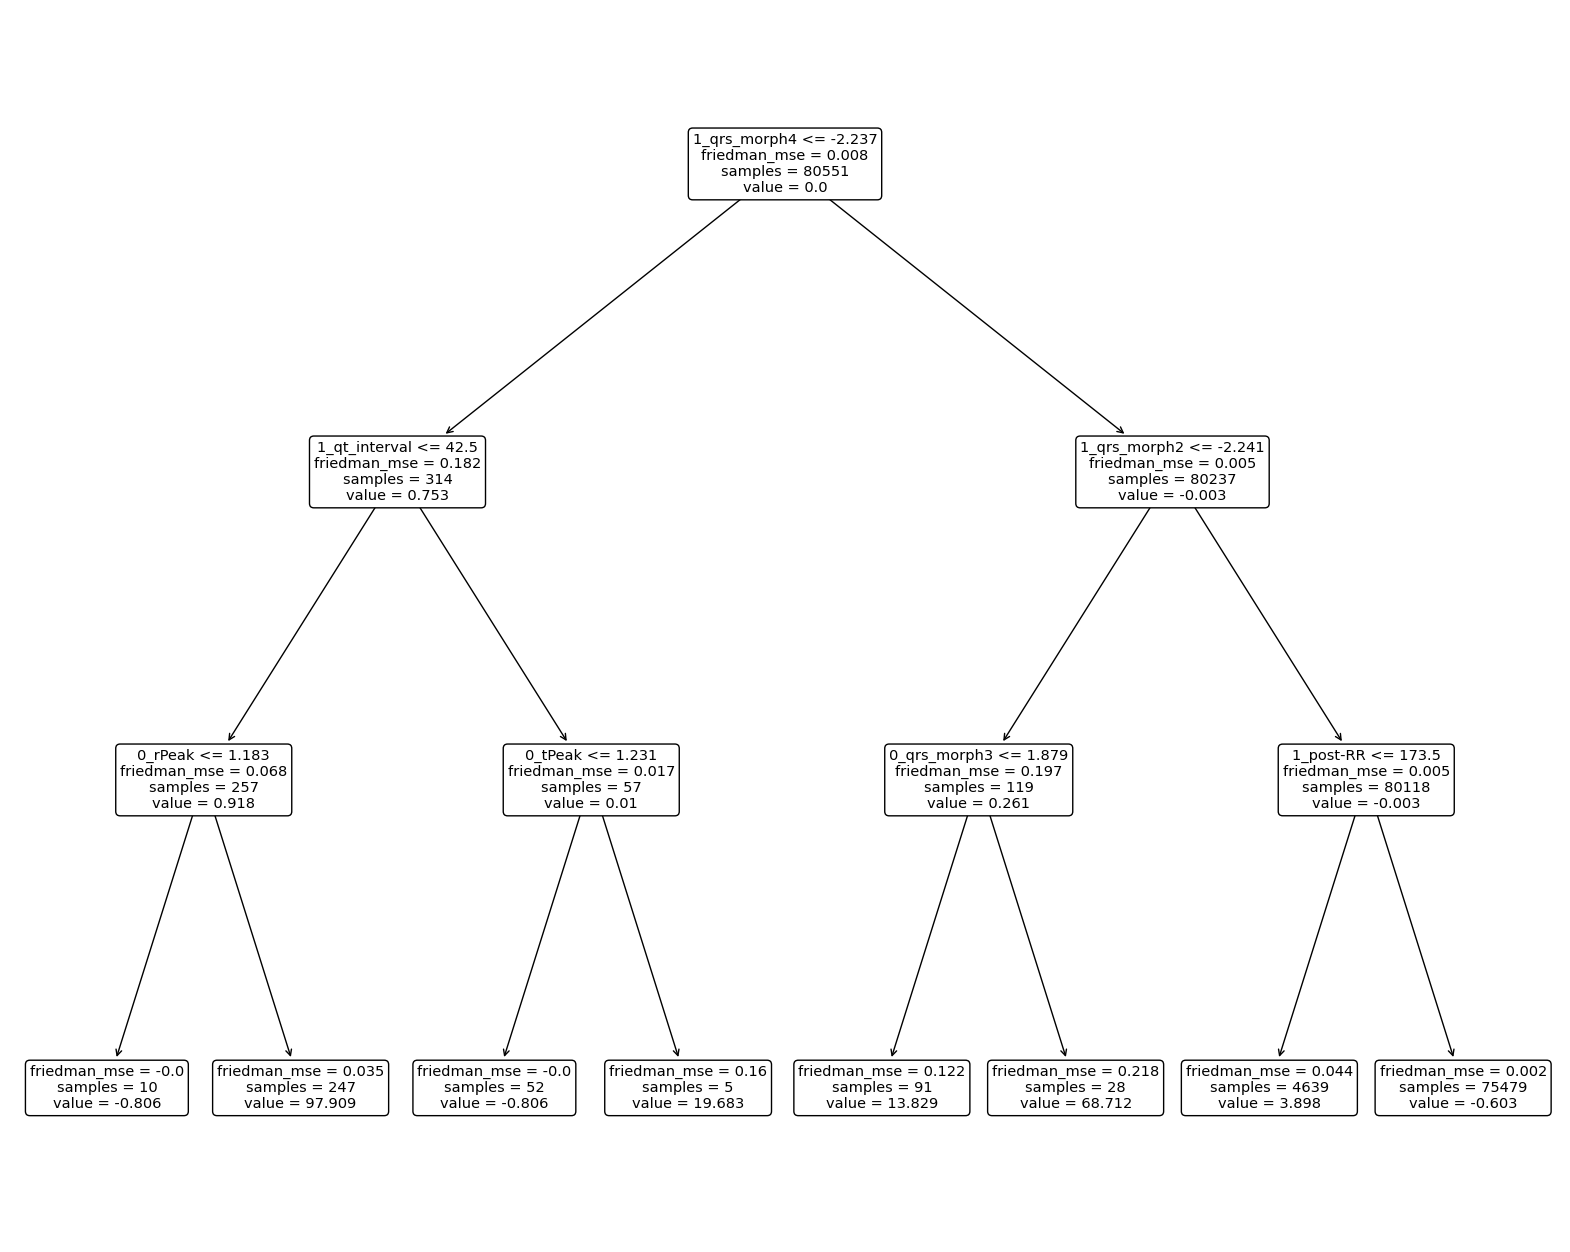

In [12]:
sub_tree_42 = gbc.estimators_[0, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_42, feature_names = columns, class_names = ['F','N','Q','SVEB', 'VEB'], rounded = True)

[Text(0.5, 0.875, '0_post-RR <= 173.5\nfriedman_mse = 0.005\nsamples = 80551\nvalue = -0.003'),
 Text(0.25, 0.625, '0_tPeak <= 1.393\nfriedman_mse = 0.044\nsamples = 4662\nvalue = 0.033'),
 Text(0.125, 0.375, '1_qrs_morph0 <= -0.75\nfriedman_mse = 0.027\nsamples = 4393\nvalue = 0.015'),
 Text(0.0625, 0.125, 'friedman_mse = 0.157\nsamples = 421\nvalue = 10.768'),
 Text(0.1875, 0.125, 'friedman_mse = 0.01\nsamples = 3972\nvalue = -0.143'),
 Text(0.375, 0.375, '0_pre-RR <= 230.0\nfriedman_mse = 0.226\nsamples = 269\nvalue = 0.334'),
 Text(0.3125, 0.125, 'friedman_mse = 0.229\nsamples = 142\nvalue = 43.348'),
 Text(0.4375, 0.125, 'friedman_mse = 0.008\nsamples = 127\nvalue = -0.228'),
 Text(0.75, 0.625, '0_post-RR <= 230.5\nfriedman_mse = 0.002\nsamples = 75889\nvalue = -0.005'),
 Text(0.625, 0.375, '1_pq_interval <= 17.5\nfriedman_mse = 0.009\nsamples = 15581\nvalue = -0.001'),
 Text(0.5625, 0.125, 'friedman_mse = 0.005\nsamples = 14177\nvalue = -0.425'),
 Text(0.6875, 0.125, 'friedman_ms

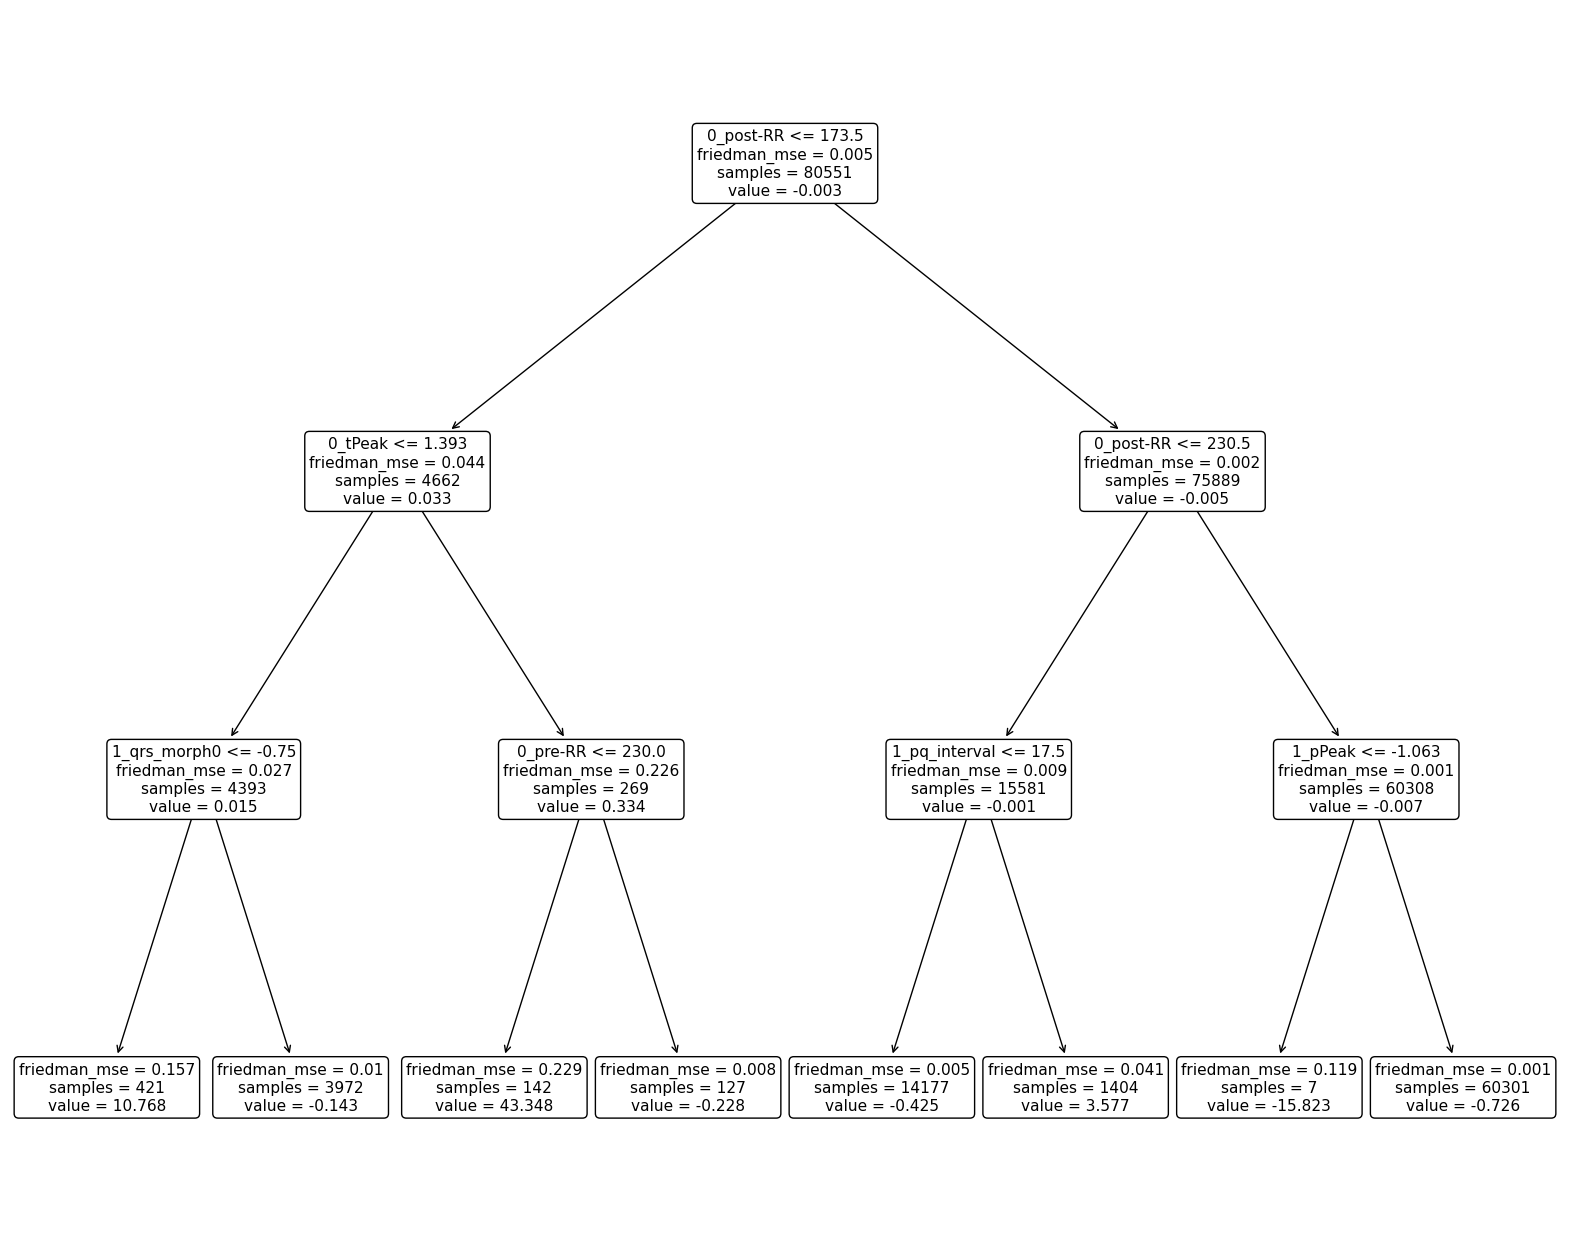

In [13]:
sub_tree_42 = gbc.estimators_[1, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_42, feature_names = columns, class_names = ['F','N','Q','SVEB', 'VEB'], rounded = True)

[Text(0.5, 0.875, '0_post-RR <= 178.5\nfriedman_mse = 0.004\nsamples = 80551\nvalue = -0.003'),
 Text(0.25, 0.625, '1_qrs_morph0 <= -0.717\nfriedman_mse = 0.032\nsamples = 5341\nvalue = 0.017'),
 Text(0.125, 0.375, '1_pq_interval <= 17.5\nfriedman_mse = 0.138\nsamples = 671\nvalue = 0.139'),
 Text(0.0625, 0.125, 'friedman_mse = 0.027\nsamples = 437\nvalue = -0.33'),
 Text(0.1875, 0.125, 'friedman_mse = 0.218\nsamples = 234\nvalue = 6.105'),
 Text(0.375, 0.375, '0_tPeak <= 1.589\nfriedman_mse = 0.014\nsamples = 4670\nvalue = -0.001'),
 Text(0.3125, 0.125, 'friedman_mse = 0.01\nsamples = 4502\nvalue = -0.307'),
 Text(0.4375, 0.125, 'friedman_mse = 0.099\nsamples = 168\nvalue = 1.003'),
 Text(0.75, 0.625, '1_qrs_morph1 <= -2.867\nfriedman_mse = 0.002\nsamples = 75210\nvalue = -0.005'),
 Text(0.625, 0.375, '0_pPeak <= -0.295\nfriedman_mse = 0.091\nsamples = 66\nvalue = -0.082'),
 Text(0.5625, 0.125, 'friedman_mse = 0.199\nsamples = 6\nvalue = -17.248'),
 Text(0.6875, 0.125, 'friedman_mse =

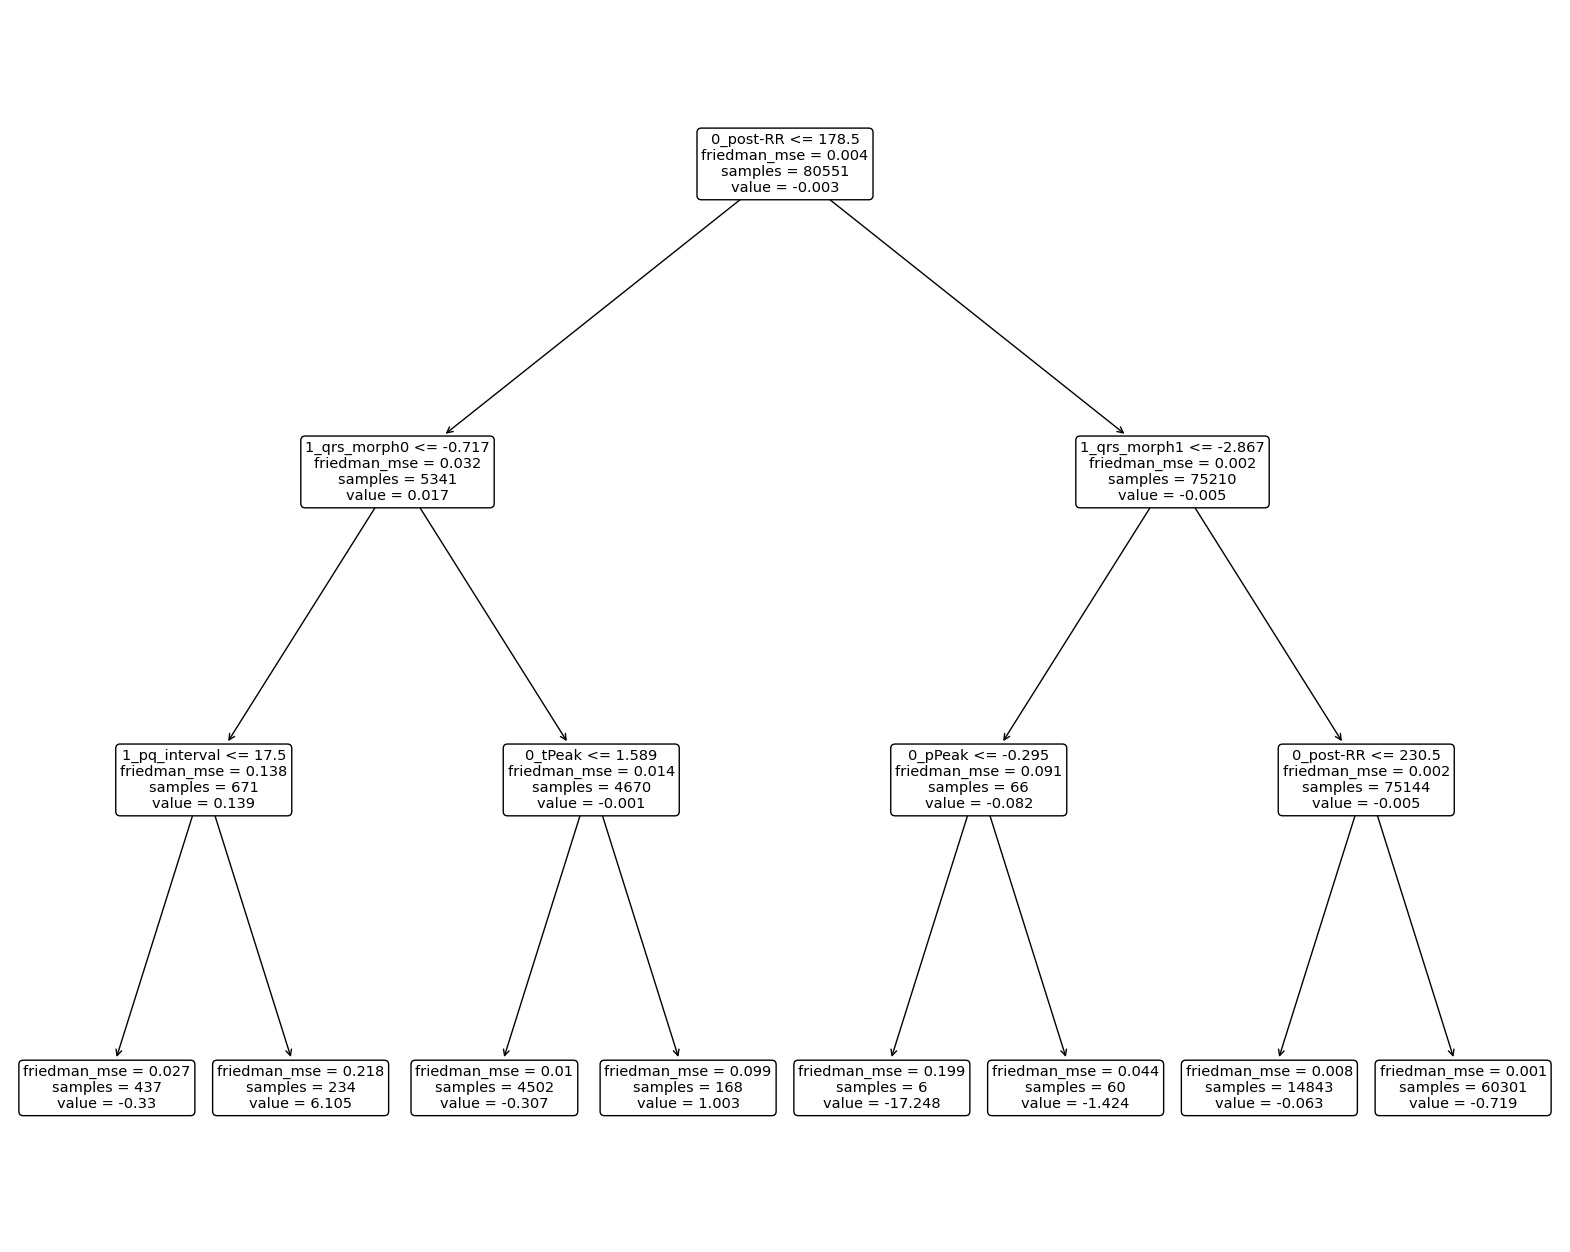

In [14]:
sub_tree_42 = gbc.estimators_[2, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_42, feature_names = columns, class_names = ['F','N','Q','SVEB', 'VEB'], rounded = True)

In [15]:
#значимость переменных
importance = gbc.feature_importances_
new_b, new_a = zip(*[(b, a) for b, a in sorted(zip(importance, columns))])
sss = np.asarray(new_a)
print(np.flip(sss))
print("Самыми значимыми признаками оказались: ", np.flip(sss)[:4])

['0_pre-RR' '1_pre-RR' '0_post-RR' '0_st_interval' '1_post-RR' '0_rPeak'
 '0_sPeak' '1_st_interval' '1_qt_interval' '0_qrs_morph4' '0_qrs_interval'
 '1_pq_interval' '0_qrs_morph0' '1_sPeak' '0_qPeak' '0_tPeak' '1_tPeak'
 '1_qPeak' '0_pq_interval' '1_qrs_morph4' '0_qrs_morph2' '1_qrs_morph0'
 '1_rPeak' '0_pPeak' '0_qt_interval' '1_qrs_interval' '1_pPeak'
 '1_qrs_morph1' '0_qrs_morph1' '0_qrs_morph3' '1_qrs_morph3'
 '1_qrs_morph2']
Самыми значимыми признаками оказались:  ['0_pre-RR' '1_pre-RR' '0_post-RR' '0_st_interval']


In [ ]:
#Построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев
param_test1 = {'n_estimators':range(5,81,5)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,subsample=0.8), 
                        param_grid = param_test1,n_jobs=16)
gsearch1.fit(X_train,y_train)
print(gsearch1.cv_results_[ 'mean_test_score'])
print("максимальное количество деревьев ",gsearch1.best_params_)
print("лучший результат", gsearch1.best_score_)

In [ ]:
gsearch1.cv_results_

### 5. Применить метод случайного леса. Вычислить значимость переменных. Построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print("f1-score:", classification_report(y_test, y_pred, output_dict=True)['accuracy'])

[[  128    22     0     0    10]
 [    2 18044     0     9    14]
 [    0     3     0     0     0]
 [    0    95     0   431     6]
 [    4    53     0     1  1316]]

              precision    recall  f1-score   support

           F       0.96      0.80      0.87       160
           N       0.99      1.00      0.99     18069
           Q       0.00      0.00      0.00         3
        SVEB       0.98      0.81      0.89       532
         VEB       0.98      0.96      0.97      1374

    accuracy                           0.99     20138
   macro avg       0.78      0.71      0.74     20138
weighted avg       0.99      0.99      0.99     20138

f1-score: 0.9891250372430231


In [19]:
importance = rfc.feature_importances_
new_b, new_a = zip(*[(b, a) for b, a in sorted(zip(importance, columns))])
sss = np.asarray(new_a)
print(np.flip(sss))
print("Самыми значимыми признаками оказались: ", np.flip(sss)[:4])

['0_pre-RR' '1_pre-RR' '0_sPeak' '0_post-RR' '1_post-RR' '0_qrs_morph4'
 '0_rPeak' '1_tPeak' '0_qrs_interval' '0_qrs_morph0' '0_qrs_morph2'
 '1_qt_interval' '0_qrs_morph3' '0_qPeak' '0_st_interval' '0_pPeak'
 '0_qrs_morph1' '1_qrs_morph4' '1_st_interval' '1_qrs_morph2' '1_sPeak'
 '0_tPeak' '1_qrs_morph3' '1_pq_interval' '1_qrs_morph0' '1_rPeak'
 '0_qt_interval' '1_qPeak' '1_qrs_morph1' '0_pq_interval' '1_qrs_interval'
 '1_pPeak']
Самыми значимыми признаками оказались:  ['0_pre-RR' '1_pre-RR' '0_sPeak' '0_post-RR']


In [ ]:
param_test1 = {'n_estimators':range(5,141,5)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
param_grid = param_test1,n_jobs=16, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.cv_results_[ 'mean_test_score'])
print("максимальное количество деревьев ",gsearch1.best_params_)
print("лучший результат", gsearch1.best_score_)

In [ ]:
gsearch1.cv_results_